<a href="https://colab.research.google.com/github/IllgamhoDuck/Quantum-Circuit-Optimization-with-Deep-learning/blob/master/Check_how_circuit_optimized_depends_on_quantum_backend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Check how circuit optimized depends on quantum backend
**Quantum circuit optimized differently relying on quantum backend**

Circuit optimization is heavily related to hardware information like topologie of qubits and noise information of gates, qubits etc. Tranpiler consider this hardware information while optimizing the quantum circuit. Even we are optimizing the same circuit, depends on what quantum backend we use the optimized circuit will vary. We will check it at here

### Setting environment
- package install
- package import
- IBMQ experience user token save and load

In [0]:
!pip install --quiet qiskit nxpd

In [0]:
%matplotlib inline
from qiskit import QuantumCircuit
from qiskit.compiler import transpile
from qiskit.transpiler import PassManager
from qiskit import execute, IBMQ, Aer

In [0]:
# This only has to be run once per Python run-time to get it to work with your IBM Q Experience account
# In the IBM Q Composer, click your avatar (top right), select My Account, click Advanced.
# If the API Token field is empty, click Regenerate. 
# Press Copy API Token in the composer, and then paste the result into the token string literal value below
# Uncomment the lines to run them, which only has to be done once.

# TODO - Save your token to your computer
token = "YOUR TOKEN HERE from IBMQ Experience"
IBMQ.save_account(token)

In [0]:
# This loads the user's API access key, which was previously saved in a one-time setup above.
IBMQ.load_accounts()

### Optimize step 0 - Check available Backend and load
**Available backends**

    - ibmq_qasm_simulator
    - ibmq_16_melbourne
    - ibmq_ourense
    - ibmqx2
    - ibmq_vigo
    - ibmq_london
    - ibmq_burlington
    - ibmq_essex

In [0]:
try:
    # Obtain an available quantum computer
    ibmq_backends = IBMQ.backends()
    print("Running on device: ", ibmq_backends)
except:
    print("All devices are currently unavailable.")

In [0]:
ibmq_london = IBMQ.get_backend('ibmq_london')
ibmq_ourense = IBMQ.get_backend('ibmq_ourense')
ibmq_burlington = IBMQ.get_backend('ibmq_burlington')

### Optimize step 1 - Create circuit to test

In [0]:
circuit = QuantumCircuit(5)
circuit.h(3)
circuit.cx(0, 1)
circuit.cx(3, 1)
circuit.cx(3, 0)
circuit.cx(1, 4)

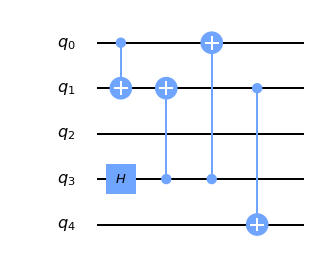

In [0]:
circuit.draw(output='mpl')

### Optimize step 2 - Unroll the circuit

gates =  OrderedDict([('cx', 4), ('u2', 1)])
depth =  3


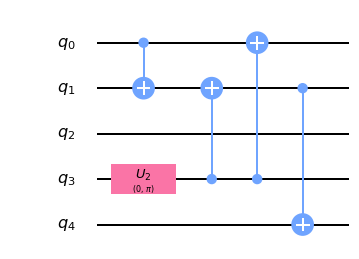

In [0]:
from qiskit.transpiler.passes import Unroller
pass_ = Unroller(['u1', 'u2', 'u3', 'cx'])
pm = PassManager(pass_)
unrolled = pm.run(circuit)
print('gates = ', unrolled.count_ops())
print('depth = ', unrolled.depth())
unrolled.draw(output='mpl')

### Optimize step 3 - Optimize the same circuit using different backend

**We used 3 different backend to a same circuit created at upper cell**

    IBMQ london
    IBMQ ourense
    IBMQ burlington

seed_transpiler and optimized level is fixed to 11, 3, respectively

    You can see the difference of 3 optimized circuit.
    Also the layout of each optimized circuit is different.
    This shows that circuit optimization is heavily related to quantum hardware topologie and noise


gates =  OrderedDict([('cx', 9), ('u2', 8), ('u3', 2), ('u1', 1)])
depth =  14


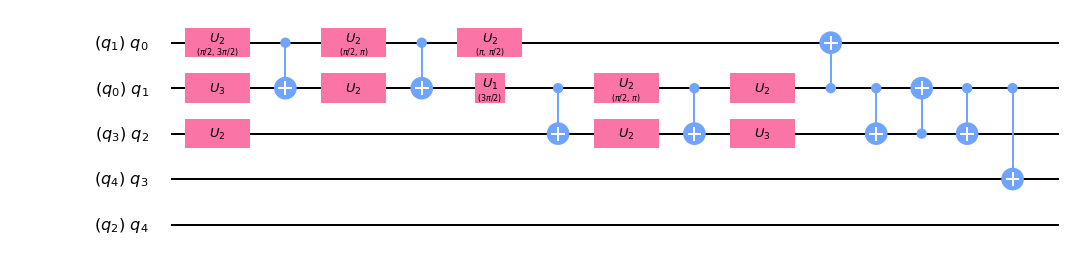

In [0]:
optimized_london = transpile(circuit, backend=ibmq_london, seed_transpiler=11, optimization_level=3)
print('gates = ', optimized_london.count_ops())
print('depth = ', optimized_london.depth())
optimized_london.draw(output='mpl')

gates =  OrderedDict([('cx', 11), ('u2', 6), ('u3', 1)])
depth =  14


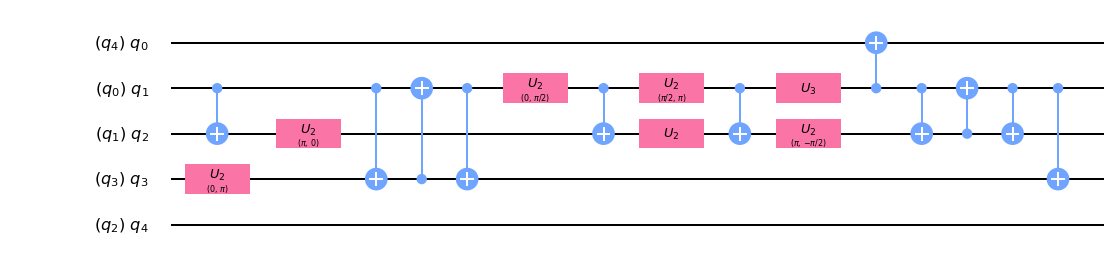

In [0]:
optimized_ourense = transpile(circuit, backend=ibmq_ourense, seed_transpiler=11, optimization_level=3)
print('gates = ', optimized_ourense.count_ops())
print('depth = ', optimized_ourense.depth())
optimized_ourense.draw(output='mpl')

gates =  OrderedDict([('u2', 9), ('cx', 9), ('u3', 3)])
depth =  10


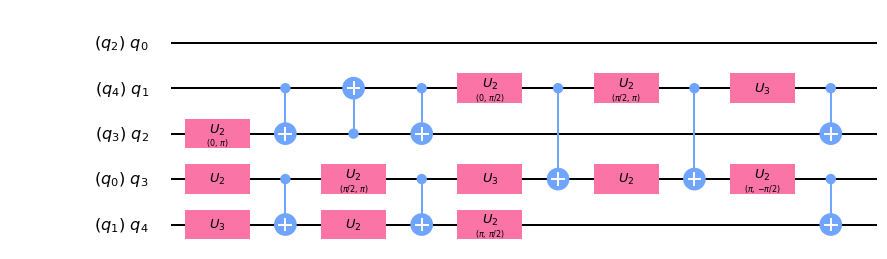

In [0]:
optimized_burlington = transpile(circuit, backend=ibmq_burlington, seed_transpiler=11, optimization_level=3)
print('gates = ', optimized_burlington.count_ops())
print('depth = ', optimized_burlington.depth())
optimized_burlington.draw(output='mpl')